In [111]:
# mounting and importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem - 1: Perform a classification task with knn from scratch.
##1. Load the Dataset:
• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [67]:
# reading the dataset ito a dataframe
dataframe = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
# displaying first few rows
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#The Exploratory data analysis of the data:


In [68]:
# checking datatypes:

datatype_check = dataframe.dtypes
print(datatype_check)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [69]:
# checking the missing values

missing_values_count = dataframe.isnull().sum()
print(missing_values_count)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [70]:
# checking summary statistics

summary_statistics = dataframe.describe()
print(summary_statistics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

##2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [71]:
# using mean fill to fill any null values(no null values in our case)

null_values_fill = dataframe.fillna(dataframe.mean())
print(null_values_fill)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

##Feature Engineering:
• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [72]:
# seperating the features(x) and target(y)
x_features = dataframe.drop("Outcome", axis=1)
y_target = dataframe["Outcome"]

# creating matrix
x_matrix = np.array(x_features.values)
y_matrix = np.array(y_target.values)

print("Matrix of x variables: \n", x_matrix)
print("Matrix of y targets: \n", y_matrix)

Matrix of x variables: 
 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Matrix of y targets: 
 [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1

In [73]:
# train test split

def test_train_split(x, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed) #takes random using random seed

  indices = np.arange(x.shape[0]) #arranges the x input
  np.random.shuffle(indices) #shuffles the x input for random selection

  test_split_size = int(len(x) * test_size) #finds the size for test data

  test_indices = indices[:test_split_size] #takes 0-test_split_size for test
  train_indices = indices[test_split_size:] # takes test_split_size to n for train

  x_train, x_test = x[train_indices], x[test_indices] #splits the data using the indices and stores then
  y_train, y_test = y[train_indices], y[test_indices]

  return x_train, x_test, y_train, y_test

# calling the function
x_train, x_test, y_train, y_test = test_train_split(x_matrix, y_matrix)


In [74]:
print("The matrix of training set of x is: \n", x_train)


The matrix of training set of x is: 
 [[  5.     77.     82.    ...  35.8     0.156  35.   ]
 [  1.     95.     60.    ...  23.9     0.26   22.   ]
 [  5.    105.     72.    ...  36.9     0.159  28.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]


In [75]:
print("The matrix of testing set of x is: \n", x_test)


The matrix of testing set of x is: 
 [[6.00e+00 9.80e+01 5.80e+01 ... 3.40e+01 4.30e-01 4.30e+01]
 [2.00e+00 1.12e+02 7.50e+01 ... 3.57e+01 1.48e-01 2.10e+01]
 [2.00e+00 1.08e+02 6.40e+01 ... 3.08e+01 1.58e-01 2.10e+01]
 ...
 [4.00e+00 1.09e+02 6.40e+01 ... 3.48e+01 9.05e-01 2.60e+01]
 [0.00e+00 1.27e+02 8.00e+01 ... 3.63e+01 8.04e-01 2.30e+01]
 [6.00e+00 1.05e+02 7.00e+01 ... 3.08e+01 1.22e-01 3.70e+01]]


In [76]:
print("The matrix of training set of y is: \n", y_train)


The matrix of training set of y is: 
 [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0

In [77]:
print("The matrix of testing set of y is: \n", y_test)

The matrix of testing set of y is: 
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0]


##4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.


In [78]:
# creating function to calculate the euclidean distance between two points

def euclidean_distance(x1, x2):
  if x1.shape != x2.shape:
    raise ValueError("Input arrays must have the same shape")

  distance = np.sqrt(np.sum((x1 - x2) ** 2))

  return distance

In [79]:
# creating function to predict the class for a single query

def predict_class_single(query, x_train, y_train, k = 3):
  distances = [euclidean_distance(query, x) for x in x_train]

  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = y_train[k_indices]

  prediction = np.bincount(k_nearest_labels).argmax()
  return prediction

In [80]:
# creating function to predict the class for all test samples

def predict_class_all(x_test, x_train, y_train, k = 3):
  predictions = [predict_class_single(x, x_train, y_train, k) for x in x_test]

  return np.array(predictions)

In [85]:
# creating function to calculate the accuracy of the KNN predictions

def accuracy_knn(y_true, y_pred):
  correct_predictions =  np.sum(y_true == y_pred)
  total_predictions = len(y_true)

  accuracy = (correct_predictions / total_predictions) * 100

  return accuracy

In [89]:
# calculating the acuracy
try:
  # predictions using predict_class_all() function
  predictions = predict_class_all(x_test, x_train, y_train, k = 3)

  # now calculating the accuracy
  accuracy = accuracy_knn(y_test, predictions)
  # printing the value
  print(f"The accuracy of the system is: {accuracy: .2f}%")
except Exception as e:
  print("Error: ", e)

The accuracy of the system is:  67.39%


#Problem- 2- Experimentation:
## 1. Repeat the Classification Task:
 • Scale the Feature matrix X.

 • Use the scaled data for training and testing the kNN Classifier.
 • Record the results.
## 2. Comparative Analysis: Compare the Results
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
 versus the scaled dataset.

 • Discuss:– How scaling impacted the KNN performance.– The reason for any observed changes in accuracy

In [83]:
# scaling the feature matrix x using normalization

# finding min and max of the training matrix
x_min_train = x_train.min(axis = 0)
x_max_train = x_train.max(axis = 0)

# finding min and max of the testing matrix
x_min_test = x_test.min(axis = 0)
x_max_test = x_test.max(axis = 0)

# scaling the data
x_train_scaled = (x_train - x_min_train) / (x_max_train - x_min_train)
x_test_scaled = (x_test - x_min_test) / (x_max_test - x_min_test)

# printing the scaled data

print("The scaled data of train matrix is: ", x_train_scaled)
print("The scaled data of test matrix is: ", x_test_scaled)



The scaled data of train matrix is:  [[0.29411765 0.38693467 0.67213115 ... 0.53353204 0.03330487 0.23333333]
 [0.05882353 0.47738693 0.49180328 ... 0.3561848  0.07771136 0.01666667]
 [0.29411765 0.52763819 0.59016393 ... 0.54992548 0.03458582 0.11666667]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]
The scaled data of test matrix is:  [[0.46153846 0.27205882 0.50877193 ... 0.59336824 0.22619048 0.47826087]
 [0.15384615 0.375      0.65789474 ... 0.62303665 0.03968254 0.        ]
 [0.15384615 0.34558824 0.56140351 ... 0.53752182 0.0462963  0.        ]
 ...
 [0.30769231 0.35294118 0.56140351 ... 0.60732984 0.54034392 0.10869565]
 [0.         0.48529412 0.70175439 ... 0.63350785 0.47354497 0.04347826]
 [0.46153846 0.32352941 0.61403509 ... 0.53752182 0.02248677 0.34782609]]


In [88]:
# calculating the acuracy of scaled data
try:
  # predictions using predict_class_all() function
  predictions = predict_class_all(x_test_scaled, x_train_scaled, y_train, k = 3)

  # now calculating the accuracy
  accuracy = accuracy_knn(y_test, predictions)
  # printing the value
  print(f"The accuracy of the system is: {accuracy: .2f}%")
except Exception as e:
  print("Error: ", e)

The accuracy of the system is:  70.87%


 Scaling the data can be useful for models that use distance or gradient.

 After scaling the data, all the features in the input is brought to a same range which makes the magnitude more stable. This helps in distance calculation making them more balanced. This leads to a better overall accuracy of the model.

# Problem- 3- Experimentation with k:
##1. Vary the number of neighbors- k:
 • Run the KNN model on both the original and scaled datasets for a range of:
 k= 1,2,3,...15

 • For each k, record:– Accuracy.– Time taken to make predictions.
## 2. Visualize the Results:
 • Plot the following graphs:– k vs. Accuracy for original and scaled datasets.– k vs. Time Taken for original and scaled datasets.
## 3. Analyze and Discuss:
 • Discuss how the choice of k affects the accuracy and computational cost.

 • Identify the optimal k based on your analysis.

In [103]:
# calculating the accuracy of the KNN model using k from 1 to 15
# for original data
original_accuracy_list = []
try:
  # predictions using predict_class_all() function
  for i in range(1, 16):
    predictions = predict_class_all(x_test, x_train, y_train, k = i)
    # now calculating the accuracy
    accuracy = accuracy_knn(y_test, predictions)
    # printing the value
    print(f"The accuracy of the system for k = {i} is: {accuracy: .2f}%")
    original_accuracy_list.append(accuracy)
except Exception as e:
  print("Error: ", e)

The accuracy of the system for k = 1 is:  68.70%
The accuracy of the system for k = 2 is:  72.61%
The accuracy of the system for k = 3 is:  67.39%
The accuracy of the system for k = 4 is:  72.17%
The accuracy of the system for k = 5 is:  68.70%
The accuracy of the system for k = 6 is:  70.00%
The accuracy of the system for k = 7 is:  69.13%
The accuracy of the system for k = 8 is:  71.30%
The accuracy of the system for k = 9 is:  70.00%
The accuracy of the system for k = 10 is:  71.74%
The accuracy of the system for k = 11 is:  73.04%
The accuracy of the system for k = 12 is:  73.91%
The accuracy of the system for k = 13 is:  74.35%
The accuracy of the system for k = 14 is:  72.61%
The accuracy of the system for k = 15 is:  73.91%


In [104]:
# calculating the time taken to predict using k from 1 to 15
# for original data
original_time_taken_list = []
try:
  for i in range(1, 16):
    time_taken = timeit("predict_class_all(x_test, x_train, y_train, k = i)", globals=globals(), number = 1)
    print(f"The time taken to predict for k = {i} is: {time_taken} seconds")
    original_time_taken_list.append(time_taken)
except Exception as e:
  print("Error: ", e)


The time taken to predict for k = 1 is: 1.341513512000347 seconds
The time taken to predict for k = 2 is: 1.4503038439997908 seconds
The time taken to predict for k = 3 is: 1.4475920659997428 seconds
The time taken to predict for k = 4 is: 1.018005083999924 seconds
The time taken to predict for k = 5 is: 0.8168538789996092 seconds
The time taken to predict for k = 6 is: 0.8277948159993684 seconds
The time taken to predict for k = 7 is: 0.8377977019999889 seconds
The time taken to predict for k = 8 is: 0.8427657749998616 seconds
The time taken to predict for k = 9 is: 0.8494148159998076 seconds
The time taken to predict for k = 10 is: 0.8289953800003786 seconds
The time taken to predict for k = 11 is: 0.8529928520001704 seconds
The time taken to predict for k = 12 is: 0.8362725569995746 seconds
The time taken to predict for k = 13 is: 0.876655043000028 seconds
The time taken to predict for k = 14 is: 0.8298039159999462 seconds
The time taken to predict for k = 15 is: 0.8536840810002104 

In [105]:
# calculating the accuracy of the KNN model using k from 1 to 15
# for scaled data
scaled_accuracy_list = []
try:
  # predictions using predict_class_all() function
  for i in range(1, 16):
    predictions = predict_class_all(x_test_scaled, x_train_scaled, y_train, k = i)
    # now calculating the accuracy
    accuracy = accuracy_knn(y_test, predictions)
    # printing the value
    print(f"The accuracy of the system for k = {i} is: {accuracy: .2f}%")
    scaled_accuracy_list.append(accuracy)
except Exception as e:
  print("Error: ", e)

The accuracy of the system for k = 1 is:  70.00%
The accuracy of the system for k = 2 is:  70.43%
The accuracy of the system for k = 3 is:  70.87%
The accuracy of the system for k = 4 is:  71.74%
The accuracy of the system for k = 5 is:  71.74%
The accuracy of the system for k = 6 is:  73.48%
The accuracy of the system for k = 7 is:  71.74%
The accuracy of the system for k = 8 is:  74.35%
The accuracy of the system for k = 9 is:  74.35%
The accuracy of the system for k = 10 is:  74.35%
The accuracy of the system for k = 11 is:  74.78%
The accuracy of the system for k = 12 is:  73.04%
The accuracy of the system for k = 13 is:  74.78%
The accuracy of the system for k = 14 is:  74.78%
The accuracy of the system for k = 15 is:  76.09%


In [106]:
# calculating the time taken to predict using k from 1 to 15
# for scaled data
scaled_time_taken_list = []
try:
  for i in range(1, 16):
    time_taken = timeit("predict_class_all(x_test_scaled, x_train_scaled, y_train, k = i)", globals=globals(), number = 1)
    print(f"The time taken to predict for k = {i} is: {time_taken} seconds")
    scaled_time_taken_list.append(time_taken)
except Exception as e:
  print("Error: ", e)


The time taken to predict for k = 1 is: 1.6168035719992986 seconds
The time taken to predict for k = 2 is: 1.4487627359994804 seconds
The time taken to predict for k = 3 is: 0.9733675400002539 seconds
The time taken to predict for k = 4 is: 0.8248076090003451 seconds
The time taken to predict for k = 5 is: 0.9174176189999343 seconds
The time taken to predict for k = 6 is: 0.8247096089999104 seconds
The time taken to predict for k = 7 is: 0.8209608240003945 seconds
The time taken to predict for k = 8 is: 0.8346650050007156 seconds
The time taken to predict for k = 9 is: 0.8235506729997724 seconds
The time taken to predict for k = 10 is: 0.8186622989996977 seconds
The time taken to predict for k = 11 is: 0.8367257319996497 seconds
The time taken to predict for k = 12 is: 0.8183067930003745 seconds
The time taken to predict for k = 13 is: 0.8278902689999086 seconds
The time taken to predict for k = 14 is: 0.8267661840000073 seconds
The time taken to predict for k = 15 is: 1.30994625099992

In [118]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# creating dataframe for accuracy data
accuracy_df = pd.DataFrame({
    "k": k,
    "Original Accuracy": original_accuracy_list,
    "Scaled Accuracy": scaled_accuracy_list
}).set_index("k")
print(accuracy_df)

    Original Accuracy  Scaled Accuracy
k                                     
1           68.695652        70.000000
2           72.608696        70.434783
3           67.391304        70.869565
4           72.173913        71.739130
5           68.695652        71.739130
6           70.000000        73.478261
7           69.130435        71.739130
8           71.304348        74.347826
9           70.000000        74.347826
10          71.739130        74.347826
11          73.043478        74.782609
12          73.913043        73.043478
13          74.347826        74.782609
14          72.608696        74.782609
15          73.913043        76.086957


Text(0.5, 1.0, 'Accuracy of KNN Model for Original and Scaled Data')

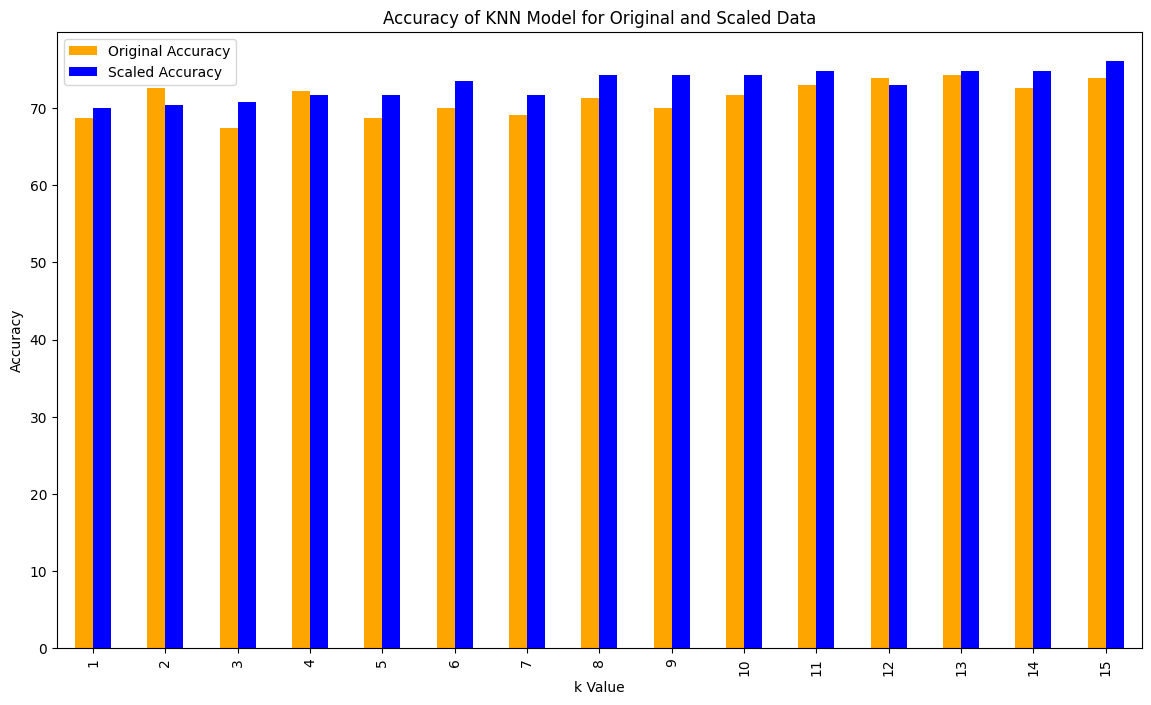

In [136]:
# ploting the data in grouped bar chart
accuracy_bar = accuracy_df.plot(kind='bar', figsize=(14, 8), color=['orange', 'blue'])
plt.ylabel("Accuracy")
plt.xlabel("k Value")
plt.title("Accuracy of KNN Model for Original and Scaled Data")


In [122]:
# creating dataframe for time taken
time_taken_df = pd.DataFrame({
    "k": k,
    "Original Time Taken": original_time_taken_list,
    "Scaled Time Taken": scaled_time_taken_list
}).set_index("k")
print(time_taken_df)

    Original Time Taken  Scaled Time Taken
k                                         
1              1.341514           1.616804
2              1.450304           1.448763
3              1.447592           0.973368
4              1.018005           0.824808
5              0.816854           0.917418
6              0.827795           0.824710
7              0.837798           0.820961
8              0.842766           0.834665
9              0.849415           0.823551
10             0.828995           0.818662
11             0.852993           0.836726
12             0.836273           0.818307
13             0.876655           0.827890
14             0.829804           0.826766
15             0.853684           1.309946


Text(0.5, 1.0, 'Time Taken of KNN Model for Original and Scaled Data')

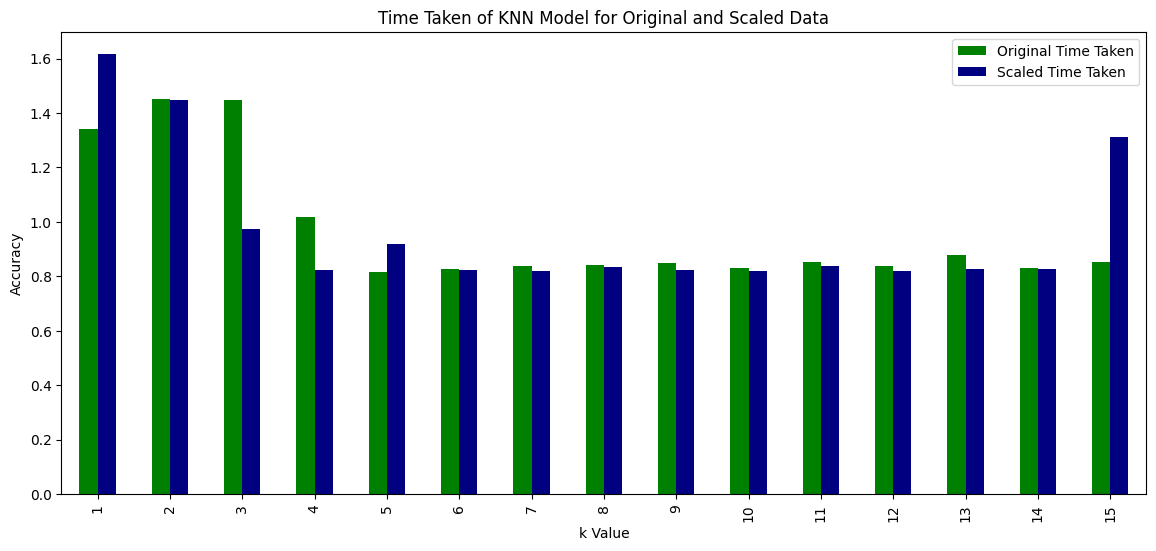

In [135]:
# ploting the data in grouped bar chart for timing
time_bar = time_taken_df.plot(kind = 'bar', figsize = (14, 6), color = ['green', 'navy'])
plt.ylabel("Accuracy")
plt.xlabel("k Value")
plt.title("Time Taken of KNN Model for Original and Scaled Data")

In a KNN model, the value of k is a hyper parameter set by the user. It is the total number of nearest class that is needed to be selected to find the class prediction of a given testing.

Analyzing the comparison and the bar chart, it can seen that as the value of k increases the overall accuracy of the model also gradually increases. In some cases where the value of k is even, the accuracy is comparitively lower than odd value of k. For example when k - 12, the accuracy of both original and scaled data is lower. As the model selects the nearest class to predict the data, if we use even numbers, it may create a tie between the classes selected leading to a inaccurate prediction.

According to my analysis, the optimal k for original data is 13 where the overall accuracy is 74.35% adn the optimal k for scaled data is 15 where the overall accuracy is 76.09%.